In [107]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
x_org, y_org = iris.data, iris.target
print(f"原始數據: x_org shape => {x_org.shape}, y_org shape => {y_org.shape}")

原始數據: x_org shape => (150, 4), y_org shape => (150,)


In [108]:
x_data, y_data = iris.data[:100,:2], iris.target[:100]
print(f"目標數據: x_data shape => {x_data.shape},  y_data shape => {y_data.shape}")
x_data = np.insert(x_data, 0, 1.0, axis=1)
print('添加虛擬變量後之x_data shape: ', x_data.shape)

目標數據: x_data shape => (100, 2),  y_data shape => (100,)
添加虛擬變量後之x_data shape:  (100, 3)


In [109]:
# 訓練資料與驗證資料的分割(同時進行係排)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30, 
    random_state=123)
print(f"shape: x_train => {x_train.shape}, x_test => {x_test.shape}, y_train => {y_train.shape}, y_test => {y_test.shape}")

shape: x_train => (70, 3), x_test => (30, 3), y_train => (70,), y_test => (30,)


In [110]:
# 設定訓練用變數
x = x_train
yt = y_train

print(x[:5])
print(yt[:5])

[[1.  5.1 3.7]
 [1.  5.5 2.6]
 [1.  5.5 4.2]
 [1.  5.6 2.5]
 [1.  5.4 3. ]]
[0 1 0 1 1]


In [111]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# predict function
def pred(x, w):
    return sigmoid(x @ w)

In [112]:
#損失函數(cross entropy)
def cross_entropy(yt, yp):
    #計算ce
    ce = -(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
    #計算ce平均值
    return np.mean(ce)

#預測結果的機率小於0.5判斷為0，反之1
def classify(y):
    return np.where(y<0.5, 0, 1)

#評估模型函數
from sklearn.metrics import accuracy_score
def evaluate(xt, yt, w):
    #計算預測值
    yp = pred(xt, w)
    
    #計算損失函數
    loss = cross_entropy(yt ,yp)
    
    #將預測值(機率值)轉換為0或1
    yp_b = classify(yp)
    
    #計算準確率
    score = accuracy_score(yt, yp_b)
    return loss, score

In [113]:
#初始化處理

# M=>樣本數  D=>資料維度(含虛擬變數)
M, D = x.shape

#迭代運算次數
iters = 10000

#學習率
alpha = 0.01

#權重初始值
w = np.ones(D)

#紀錄評估結果(損失函數與準確率)
history = np.zeros((0, 3))

In [114]:
#反覆運算循環

for k in range(iters):
    
    #計算預測值
    yp = pred(x, w)
    
    #計算誤差
    yd = yp - yt;
    
    #梯度下降法
    w = w - alpha * (x.T @ yd) / M
    
    if(k % 10 == 0):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack((history, np.array([k, loss, score])))
        print(f"iter={k}, loss={loss}, score={score}")

iter=0, loss=4.4938418186342695, score=0.5
iter=10, loss=3.5653746821145016, score=0.5
iter=20, loss=2.6432800136630172, score=0.5
iter=30, loss=1.7624443715382831, score=0.5
iter=40, loss=1.0853746168129417, score=0.5
iter=50, loss=0.8187210199864775, score=0.5
iter=60, loss=0.7709340061347152, score=0.5
iter=70, loss=0.7610533742694765, score=0.3333333333333333
iter=80, loss=0.7544680484620048, score=0.2
iter=90, loss=0.7477811254870927, score=0.16666666666666666
iter=100, loss=0.7409788485045926, score=0.13333333333333333
iter=110, loss=0.7341934670614811, score=0.16666666666666666
iter=120, loss=0.727485004768387, score=0.2
iter=130, loss=0.7208745265269767, score=0.2
iter=140, loss=0.7143681994569249, score=0.26666666666666666
iter=150, loss=0.7079669564512411, score=0.3
iter=160, loss=0.7016699452228903, score=0.36666666666666664
iter=170, loss=0.6954757159531371, score=0.43333333333333335
iter=180, loss=0.689382625624149, score=0.5
iter=190, loss=0.6833889754910528, score=0.5666

iter=2670, loss=0.2539018930492477, score=0.9666666666666667
iter=2680, loss=0.25345373917796743, score=0.9666666666666667
iter=2690, loss=0.2530083449294559, score=0.9666666666666667
iter=2700, loss=0.25256568512460686, score=0.9666666666666667
iter=2710, loss=0.2521257348867282, score=0.9666666666666667
iter=2720, loss=0.2516884696370747, score=0.9666666666666667
iter=2730, loss=0.25125386509045794, score=0.9666666666666667
iter=2740, loss=0.2508218972509333, score=0.9666666666666667
iter=2750, loss=0.25039254240756126, score=0.9666666666666667
iter=2760, loss=0.24996577713024187, score=0.9666666666666667
iter=2770, loss=0.24954157826562065, score=0.9666666666666667
iter=2780, loss=0.24911992293306637, score=0.9666666666666667
iter=2790, loss=0.24870078852071487, score=0.9666666666666667
iter=2800, loss=0.24828415268158405, score=0.9666666666666667
iter=2810, loss=0.24786999332975207, score=0.9666666666666667
iter=2820, loss=0.24745828863660263, score=0.9666666666666667
iter=2830, lo

iter=6550, loss=0.17495753707221048, score=0.9666666666666667
iter=6560, loss=0.17486613191340175, score=0.9666666666666667
iter=6570, loss=0.17477498809372516, score=0.9666666666666667
iter=6580, loss=0.17468410451801003, score=0.9666666666666667
iter=6590, loss=0.174593480097215, score=0.9666666666666667
iter=6600, loss=0.17450311374838395, score=0.9666666666666667
iter=6610, loss=0.17441300439460422, score=0.9666666666666667
iter=6620, loss=0.17432315096496415, score=0.9666666666666667
iter=6630, loss=0.1742335523945114, score=0.9666666666666667
iter=6640, loss=0.1741442076242112, score=0.9666666666666667
iter=6650, loss=0.17405511560090586, score=0.9666666666666667
iter=6660, loss=0.1739662752772735, score=0.9666666666666667
iter=6670, loss=0.17387768561178754, score=0.9666666666666667
iter=6680, loss=0.17378934556867737, score=0.9666666666666667
iter=6690, loss=0.17370125411788767, score=0.9666666666666667
iter=6700, loss=0.17361341023503934, score=0.9666666666666667
iter=6710, lo

In [115]:
#開始與最後的損失函數值與準確率

print(f'初始: 損失函數={history[0, 1]}, 準確率={history[0, 2]}')
print(f'結束: 損失函數={history[-1, 1]}, 準確率={history[-1, 2]}')

初始: 損失函數=4.4938418186342695, 準確率=0.5
結束: 損失函數=0.1539467097979979, 準確率=0.9666666666666667


In [116]:
# 準備繪製散佈圖用的驗證資料

# class=0的群
x_t0 = x_test[y_test==0]
# class=1的群
x_t1 = x_test[y_test==1]

#以用於繪製決策邊界的x1值計算出x2值
def b(x, w):
    return -(w[0]+w[1]*x)/w[2]

#散佈圖中x1的最小值與最大值
x1 = np.asarray([x[:, 1].min(), x[:, 1].max()])
#算出x1最大值&最小值對應的y1，及兩端點座標
y1 = b(x1, w)

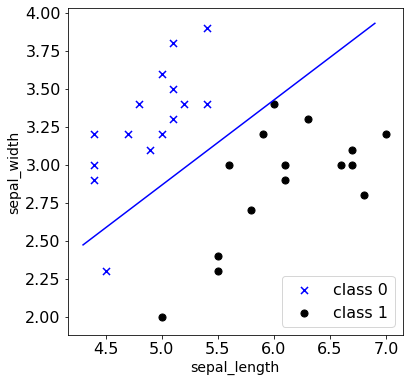

In [117]:
plt.figure(figsize=(6, 6))

#繪製散佈圖
plt.scatter(x_t0[:, 1], x_t0[:, 2], marker='x', c='b', s=50, label='class 0')
plt.scatter(x_t1[:, 1], x_t1[:, 2], marker='o', c='k', s=50, label='class 1')

#在散佈圖上繪製決策邊界的直線
plt.plot(x1, y1, c='b')

plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

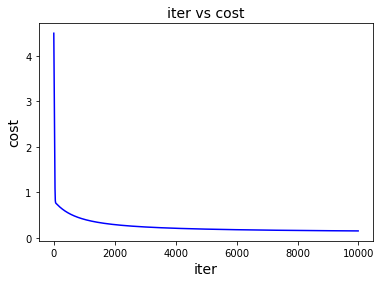

In [118]:
#繪製學習曲線(損失函數)
plt.figure(figsize=(6, 4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('iter vs cost', fontsize=14)
plt.show()

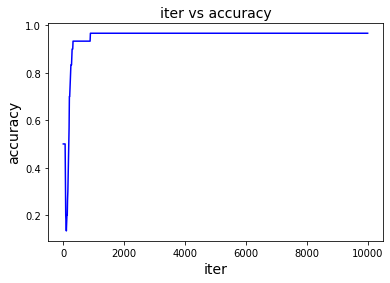

In [119]:
#繪製學習曲線(準確率)
plt.figure(figsize=(6, 4))
plt.plot(history[:,0], history[:,2], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()